In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
# helper functions
def true_error(yhat,y): 
  return 100 * abs(yhat-y)/y

### 1 (19.4) 
Evaluate the integral: 
$ \int_{-2}^{4} 1-x-4x^3+2x^5 dx $ 


Using: 
(a) Analytical
(b) Single Trapezoid
(c) Composite Trapezoid
(d) Single Simpson 1/3
(e) Composite Simpson 1/3
(f) Single Simpson 3/8
(g) Boole's Rule

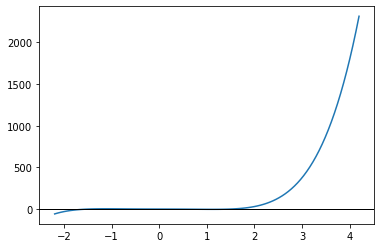

analytical solution = 1104


In [ ]:
#(a)analyticcally

# plot for vis: 
def func(x): 
  return 1 - x - 4*x**3 + 2*x**5


xplt = np.linspace(-2.2,4.2,100)
plt.plot(xplt,func(xplt))
plt.axhline(0,lw=1,c='k')
#plt.axvline(0,lw=1,c='k')
plt.show()

Ia = 1104
print(f'analytical solution = {Ia}')


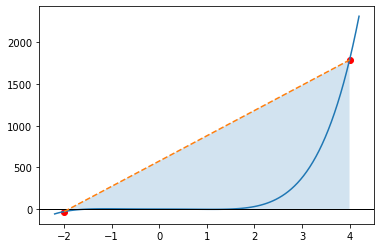

single trapezoid solution = 5280.0
True error (Et) = 378.3 %


In [ ]:
# single application of trapezoid
Ia = 1104

def func(x): 
  return 1 - x - 4*x**3 + 2*x**5

def single_trap(func,a,b): 
  area = (b-a) * (func(a) + func(b))/2
  return area

x0 = -2 
y0 = func(x0)
x1 = 4
y1 = func(x1)

# plot for vis
plt.plot(xplt,func(xplt))
plt.axhline(0,lw=1,c='k')
plt.plot([x0,x1],[y0,y1],ls='--')
plt.fill_between([x0,x1],[y0,y1],alpha=0.2)
plt.scatter(x0,y0,c='r')
plt.scatter(x1,y1,c='r')
plt.show()

# Solve
I = single_trap(func,x0,x1)
err = true_error(I,Ia)

print(f'single trapezoid solution = {I}')
print(f'True error (Et) = {err:.1f} %')

In [ ]:
Ia = 1104

def func(x): 
  return 1 - x - 4*x**3 + 2*x**5

def comp_trap(f,a,b,n): 
  f0 = f(a)
  f1 = f(b)
  xn = np.linspace(a,b,n+1)
  xnn = xn[1:-1]
  sum = np.array([f(xi) for xi in xnn]).sum()
  I = (b-a) * (f0 + 2*sum + f1)/(2*n)
  return I

ans_n2 = comp_trap(func,-2,4,2) 
ans_n4 = comp_trap(func,-2,4,4) 

print('Composite Trapezoid Results:')
print(f'when N=2: I = {ans_n2}, Et = {true_error(ans_n2,Ia):.1f}%')
print(f'when N=4: I = {ans_n4}, Et = {true_error(ans_n4,Ia):.1f}%')


Composite Trapezoid Results:
when N=2: I = 2634.0, Et = 138.6%
when N=4: I = 1516.875, Et = 37.4%


In [ ]:
# single 1/3 simpson
Ia = 1104

def func(x): 
  return 1 - x - 4*x**3 + 2*x**5

def single_simpson(f,a,b): 
  m = (b+a)/2
  f0,f2 = f(a),f(b) # a and b eval
  f1 = f(m) # midpoint eval
  I = (b-a) * (f0 + 4*f1 + f2)/6
  return I 

# solve: 
a,b = -2,4
I = single_simpson(func,a,b)
err = true_error(I,Ia)
print(f'I = {I}, Et = {err:.1f}%')

I = 1752.0, Et = 58.7%


In [ ]:
# single Simples 3/8th Rule: 
Ia = 1104

def func(x): 
  return 1 - x - 4*x**3 + 2*x**5

def single_simpson38(f,a,b): 
  f0,f1,f2,f3 = f(np.linspace(a,b,num=4))
  I = (b-a) * (f0 + 3*(f1+f2) + f3)/8
  return I

# solve: 
a,b = -2,4
I = single_simpson38(func,a,b)
err = true_error(I,Ia)
print(f'I = {I}, Et = {err:.1f}%')

I = 1392.0, Et = 26.1%


In [ ]:
# Boole's Rule: 
Ia = 1104

def func(x): 
  return 1 - x - 4*x**3 + 2*x**5

def BoolesInt(f,a,b): 
  f0,f1,f2,f3,f4 = func(np.linspace(a,b,num=5))
  return (b-a) * (7*f0 + 32*f1 + 12*f2 + 32*f3 + 7*f4)/(90)

  # solve: 
a,b = -2,4
I = BoolesInt(func,a,b)
err = true_error(I,Ia)
print(f'I = {I}, Et = {err:.1f}%')

I = 1104.0, Et = 0.0%


### all methods here

In [ ]:
# all methods

def func(x): 
  return 1 - x - 4*x**3 + 2*x**5
a,b = -2,4
Ia = 1104
method_names = ['single trapezoid','composite trapezoid (n=2)','composite trapezoid (n=4)','Simpson 1/3','Simpson 3/8',"Boole's Rule"]
methods = [single_trap(func,a,b),
           comp_trap(func,a,b,n=2),
           comp_trap(func,a,b,n=4),
           single_simpson(func,a,b),
           single_simpson38(func,a,b),
           BoolesInt(func,a,b)      
           ]
errors = [true_error(i,Ia) for i in methods]
df = pd.DataFrame(np.column_stack((method_names,methods,errors)),columns=['Methods','I','Error %']) 
df

,Methods,I,Error %
0,single trapezoid,5280.0,378.2608695652174
1,composite trapezoid (n=2),2634.0,138.58695652173913
2,composite trapezoid (n=4),1516.875,37.39809782608695
3,Simpson 1/3,1752.0,58.69565217391305
4,Simpson 3/8,1392.0,26.08695652173913
5,Boole's Rule,1104.0,0.0


### 2 (19.12)

An 11 m long beam is subjected to a load, and the shear force follows the
equation

$ V(x) = 5 + 0.25x^2$

where $V$ is the shear force, and $x$ is the length in distance along the beam. We know that $V(x) = \frac{dM}{dx}$, and $M$ is the bending moment. Integration yields the relationship

$M = M_0 + \int_{0}^{X} V(x) dx$

If $M_0 = 0$ for $x=0$, and the upper integral limit, $X - 11$ m, calculate $M$ (a) analytically, (b) using the composite trapezoid rule, and (c) composite Simpson Rule.
Use 1 m increments 

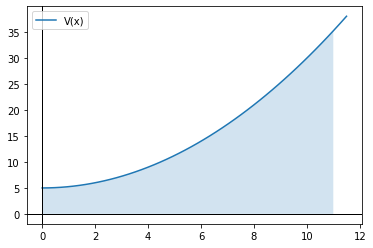

In [ ]:
# given

def Vx(x): 
  return 5 + 0.25*x**2

m = 1
X = 11 
a,b = 0,X 

# plot for visual: 
xplt = np.linspace(0,X+0.5)
plt.plot(xplt,Vx(xplt),label='V(x)')
plt.axhline(0,lw=1,c='k')
plt.axvline(0,lw=1,c='k')
plt.fill_between(np.linspace(a,b),Vx(np.linspace(a,b)),alpha=0.2)
plt.legend(loc=2)
plt.show()



Ia = 165.9167

If $M_0$ = 0 then the equation reduces to

$M = \int_0^{X=11} V(x) dx $


In [ ]:
# composite Simpson 1/3

def simpson13(f,a,b,n): 
  # n must be even, so if n is odd, I add an additional interval to make it even
  if n%2 !=0: 
    n = int(n+1)
  f0,f1 = f(a),f(b)
  xN = np.linspace(a,b,n+1)
  xNN = xN[1:-1]
  f_even  = np.array([f(xi) for xi in xNN[1::2]]).sum() 
  f_odd = np.array([f(xj) for xj in xNN[::2]]).sum() 
  I = (b-a) * (f0 + 4*f_odd + 2*f_even + f(b))/(3*n)
  return I 


In [ ]:
# b
m = 1
X = 11 
a,b = 0,X
m = 1

# get n from m
n = int((b-a)/m) 
print(f'Number of segments = {n}')

I = comp_trap(Vx,0,X,n)
err = true_error(I,Ia)
print(f'I = {I}, Et = {err:.3f}%')

Number of segments = 11
I = 166.375, Et = 0.276%


In [ ]:
I = simpson13(Vx,0,X,n)
err = true_error(I,Ia)
print(f'I = {I}, Et = {err:.3f}%')

I = 165.91666666666666, Et = 0.000%


### 3 (20.2)
Evaluate the following integral

$I = \int_0^8 (-0.055x^4 + 0.86x^3 - 4.2x^2 + 6.3x + 2)dx $

(a) analytically
(b) Romberg integration (with $\epsilon$=0.5%) 
(c) Three-point Gauss quadrature formula.

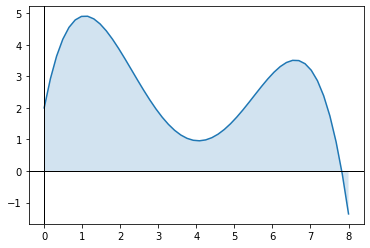

Analytical Solution Ia = 20.992


In [ ]:
# define function
def f(x): 
  return -0.055*x**4 + 0.86*x**3 - 4.2*x**2 + 6.3*x +2

# plot for vis
xplot = np.linspace(0,8)
plt.plot(xplot, f(xplot))
plt.fill_between(xplot,f(xplot),alpha=0.2)
plt.axhline(0,lw=1,c='k')
plt.axvline(0,lw=1,c='k')
plt.show()

# (a) Analytical Solution
Ia = 20.992  # solve elseware
print(f'Analytical Solution Ia = {Ia}')

In [ ]:
# (b)
# will use scipy.integrate.romberg
from scipy.integrate import romberg

I = romberg(f,0,8,show=True,tol=0.005)

Romberg integration of <function vectorize1.<locals>.vfunc at 0x7ff49bf35440> from [0, 8]

 Steps  StepSize   Results
     1  8.000000  2.560000 
     2  4.000000  5.120000  5.973333 
     4  2.000000 16.320000 20.053333 20.992000 
     8  1.000000 19.780000 20.933333 20.992000 20.992000 

The final result is 20.99199999999997 after 9 function evaluations.


In [ ]:
# (c) Gauss Quadrature
# will use python prebuilt code
from scipy.integrate import quadrature

I = quadrature(f,0,8)
print(f'I = {I[0]}')


I = 20.991999999999813


### 4 (21.4)

Use Richardson extrapolation to estimate the first derivative of $ y = cos(x) $ at x = $\pi/4$ using step sizes $h_1 = pi/3$ and $h_2 = pi/6$. Employ centered differences of $O(h^2)$ for the initial estimates

$I = \frac{4}{3} I(h_2) - \frac{1}{3} I(h_1)$

In [ ]:
def f(x): 
  return np.cos(x)

def CentralFiniteDiff(f,x,dx=1e-6): 
  return ( f(x+dx) - f(x-dx)) / (2*dx)

def richard_extrap(f,x,h1,h2):
  # Eq. 20.5
  return (4/3)*CentralFiniteDiff(f,x,dx=h2) - (1/3)*CentralFiniteDiff(f,x,dx=h1) 


x = np.pi/4
h1 = np.pi/3
h2 = np.pi/6

res_h1 = CentralFiniteDiff(f,x,dx=h1)
res_h2 = CentralFiniteDiff(f,x,dx=h2)
print(res_h1,res_h2)

richard_extrap(f,x,h1,h2)

-0.5847726009252571 -0.6752372371178295


-0.7053921158486869

### Export to PDF